# Linear Regression

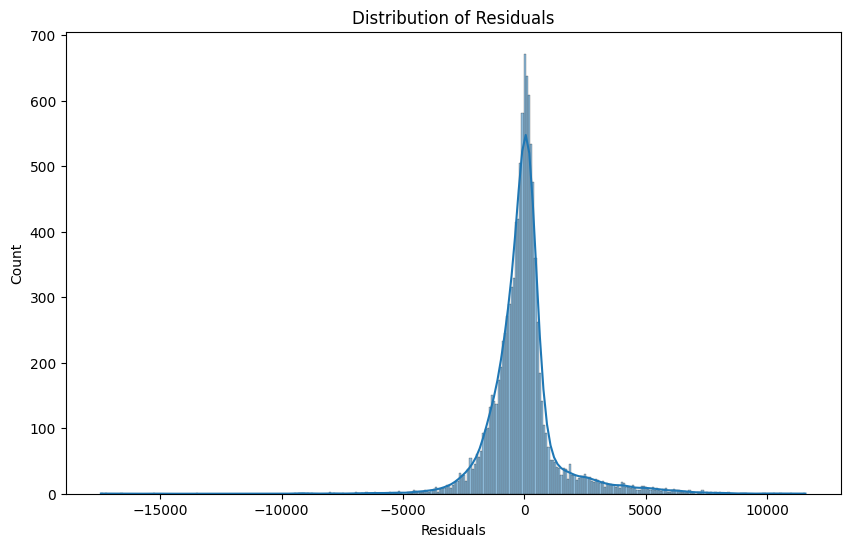

In [1]:
#1
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load data
df = sns.load_dataset('diamonds')
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)

# Calculate residuals
residuals = y_test - model.predict(X_test)

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

In [2]:
#2
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming model is already trained (from previous example)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 2242178.90
MAE: 888.48
RMSE: 1497.39


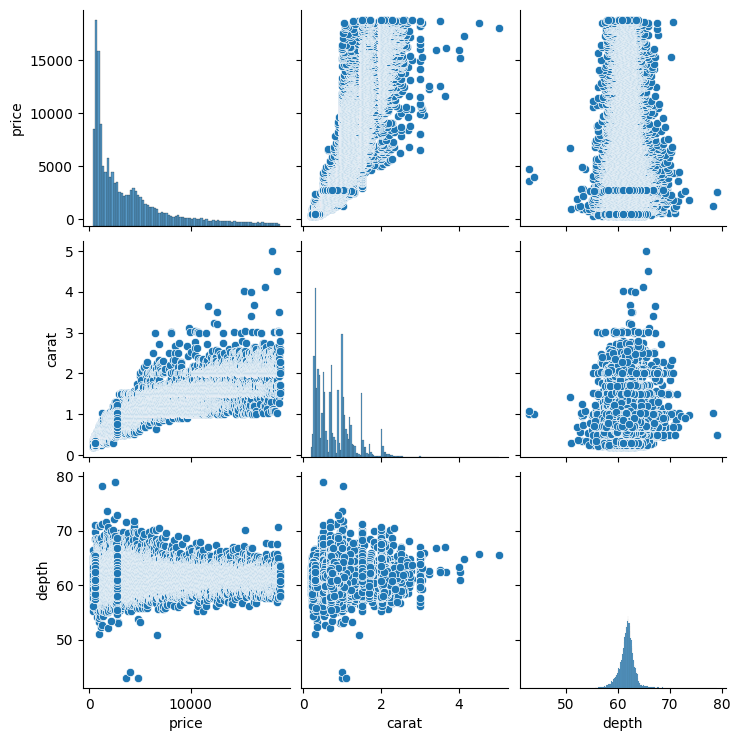

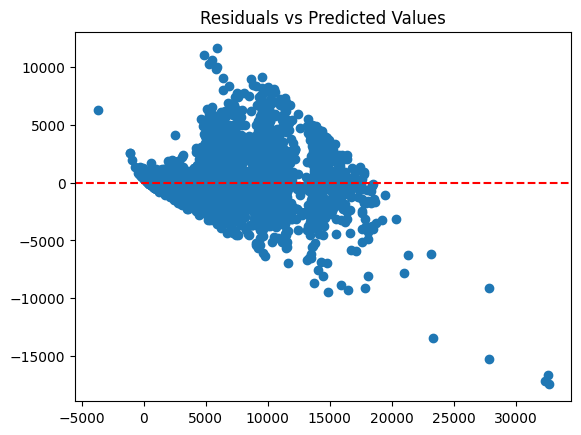

  feature          VIF
0   carat    70.132799
1   depth   515.146274
2   table   500.595341
3       x  1284.949828
4       y   530.998218
5       z   540.677349


In [4]:
#3
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Linearity check
sns.pairplot(df[['price', 'carat', 'depth']])
plt.show()

# 2. Homoscedasticity check
residuals = y_test - model.predict(X_test)
plt.scatter(model.predict(X_test), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.show()

# 3. Multicollinearity check
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

In [5]:
#4
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

# Create pipeline
pipelines = {
    'lr': Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    'ridge': Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha=1.0))]),
    'lasso': Pipeline([('scaler', StandardScaler()), ('model', Lasso(alpha=0.1))])
}

# Evaluate each model
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print(f"{name}: Mean R2 = {scores.mean():.3f}")

lr: Mean R2 = -0.669
ridge: Mean R2 = -0.670
lasso: Mean R2 = -0.670


In [6]:
#5
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

# Load data
data = load_diabetes()
X = data.data[:, np.newaxis, 2]  # Use only one feature
y = data.target

# Fit model
model = LinearRegression().fit(X, y)

print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared: {model.score(X, y):.2f}")

Coefficient: 949.44
Intercept: 152.13
R-squared: 0.34


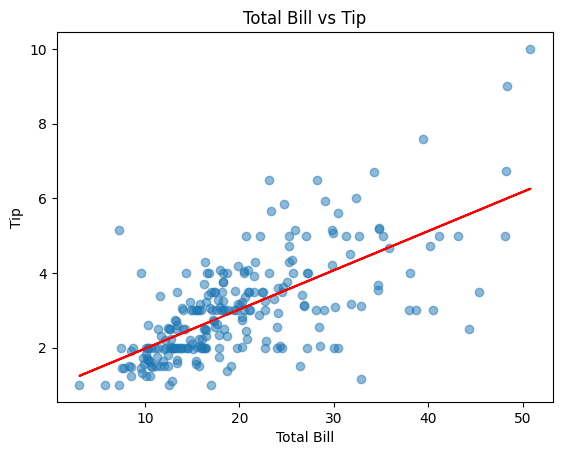

In [7]:
#6
# Load data
tips = sns.load_dataset('tips')
X = tips[['total_bill']]
y = tips['tip']

# Fit model
model = LinearRegression().fit(X, y)

# Plot
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X), color='red')
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

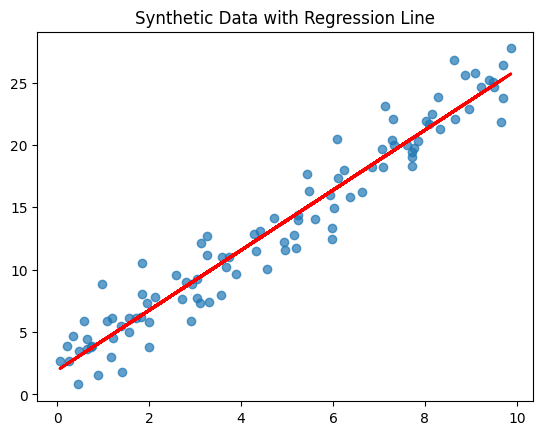

In [8]:
#7.
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2.5 * X + np.random.randn(100, 1) * 2 + 1.5

# Fit model
model = LinearRegression().fit(X, y)

# Plot
plt.scatter(X, y, alpha=0.7)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Synthetic Data with Regression Line')
plt.show()

In [9]:
#8
import pickle

# Train model (using synthetic data from previous example)
model = LinearRegression().fit(X, y)

# Save to file
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model pickled successfully!")

Model pickled successfully!


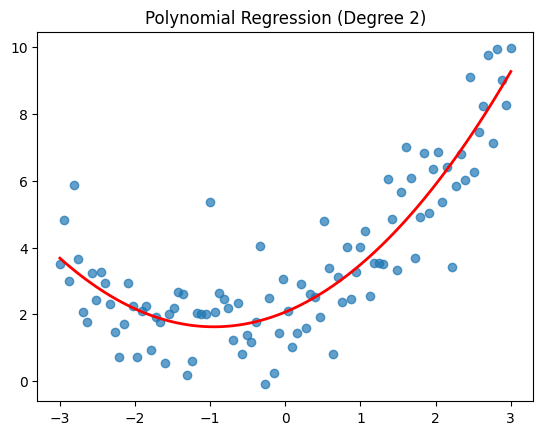

In [10]:
#9.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate curved data
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

# Fit polynomial model
poly_model = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
).fit(X, y)

# Plot
plt.scatter(X, y, alpha=0.7)
plt.plot(X, poly_model.predict(X), color='red', linewidth=2)
plt.title('Polynomial Regression (Degree 2)')
plt.show()

In [11]:
#10
# Generate data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X + np.random.randn(100, 1) * 2

# Fit model
model = LinearRegression().fit(X, y)

print(f"Coefficient: {model.coef_[0][0]:.2f}")
print(f"Intercept: {model.intercept_[0]:.2f}")

Coefficient: 2.91
Intercept: 0.43


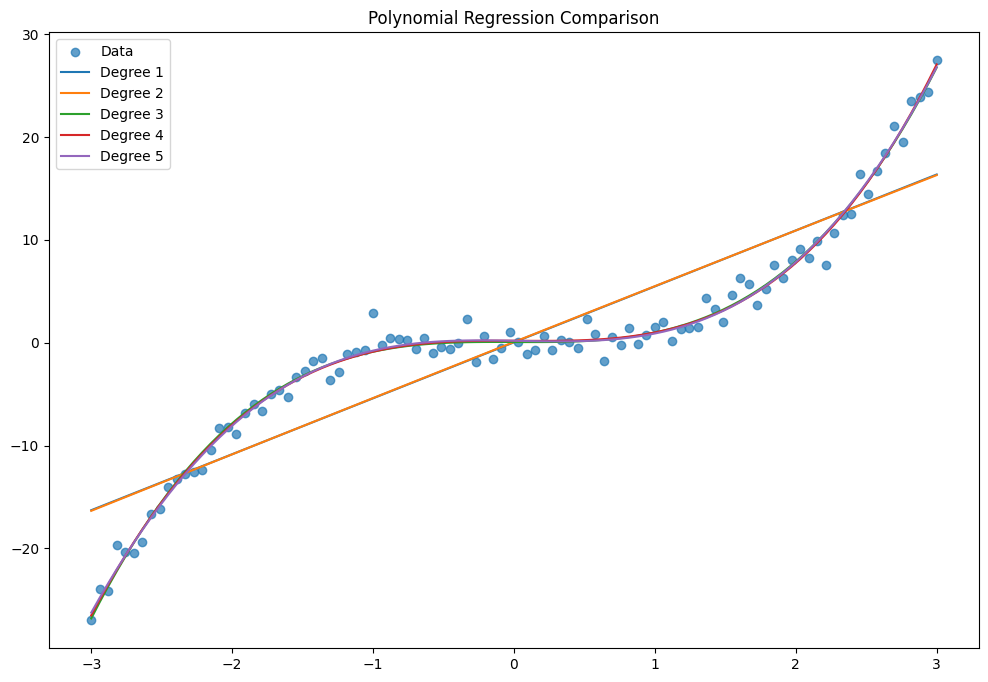

In [12]:
#11
degrees = [1, 2, 3, 4, 5]
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**3 + np.random.randn(100, 1)

plt.figure(figsize=(12, 8))
plt.scatter(X, y, alpha=0.7, label='Data')

for degree in degrees:
    model = make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression()
    ).fit(X, y)
    plt.plot(X, model.predict(X), label=f'Degree {degree}')

plt.title('Polynomial Regression Comparison')
plt.legend()
plt.show()

In [13]:
#12
from sklearn.datasets import load_diabetes

# Load data
data = load_diabetes()
X = data.data[:, :2]  # Use first two features
y = data.target

# Fit model
model = LinearRegression().fit(X, y)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared: {model.score(X, y):.2f}")

Coefficients: [301.16135996  17.3924542 ]
Intercept: 152.13
R-squared: 0.04


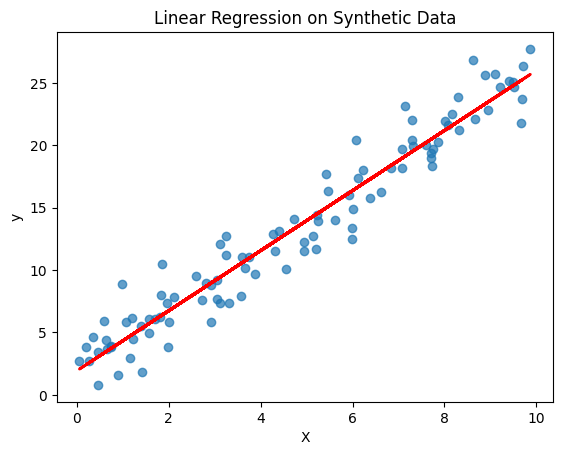

In [14]:
#13
# Generate data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2.5 * X + np.random.randn(100, 1) * 2 + 1.5

# Fit model
model = LinearRegression().fit(X, y)

# Plot
plt.scatter(X, y, alpha=0.7)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [15]:
#14
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Using diabetes dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  feature        VIF
0     age   1.217307
1     sex   1.278071
2     bmi   1.509437
3      bp   1.459428
4      s1  59.202510
5      s2  39.193370
6      s3  15.402156
7      s4   8.890986
8      s5  10.075967
9      s6   1.484623


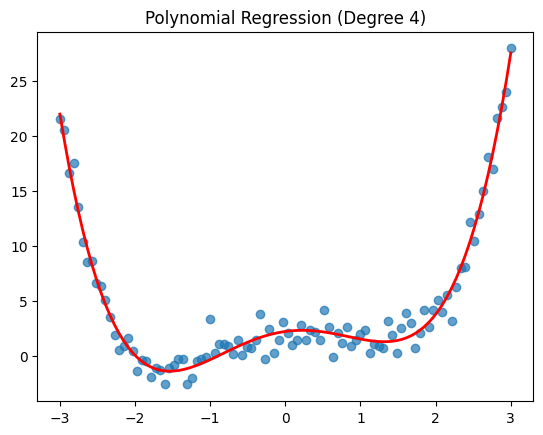

In [16]:
#15
# Generate data
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X**4 - 2 * X**2 + X + 2 + np.random.randn(100, 1)

# Fit model
poly_model = make_pipeline(
    PolynomialFeatures(degree=4),
    LinearRegression()
).fit(X, y)

# Plot
plt.scatter(X, y, alpha=0.7)
plt.plot(X, poly_model.predict(X), color='red', linewidth=2)
plt.title('Polynomial Regression (Degree 4)')
plt.show()

In [17]:
#16
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Fit and evaluate
pipeline.fit(X_train, y_train)
r2 = pipeline.score(X_test, y_test)
print(f"R-squared score: {r2:.3f}")

R-squared score: 0.994


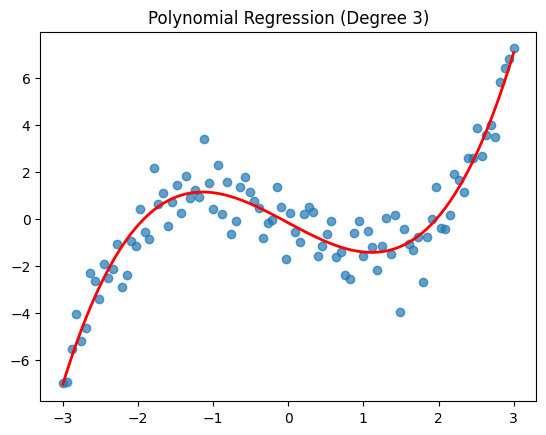

In [18]:
#17
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X**3 - 2 * X + np.random.randn(100, 1)

# Create and fit model
model = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
).fit(X, y)

# Plot results
plt.scatter(X, y, alpha=0.7)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Polynomial Regression (Degree 3)')
plt.show()

In [19]:
#18.
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=5, noise=5, random_state=42)

# Fit model
model = LinearRegression().fit(X, y)

# Print results
print(f"R-squared: {model.score(X, y):.3f}")
print("Coefficients:", model.coef_)
print(f"Intercept: {model.intercept_:.3f}")

R-squared: 0.999
Coefficients: [61.20375423 98.79174437 62.95113038 56.03447857 35.59986655]
Intercept: -0.043


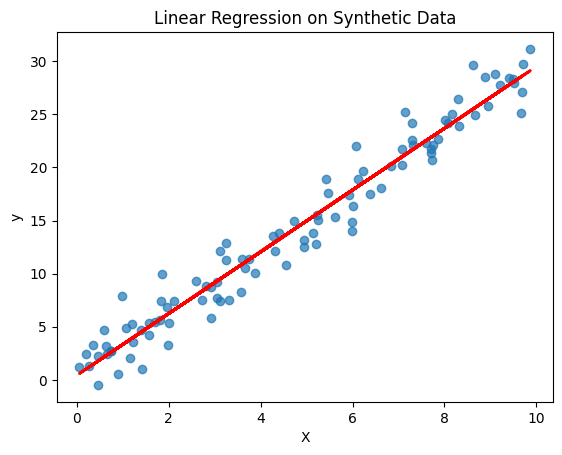

In [20]:
#19
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X + np.random.randn(100, 1) * 2

# Fit model
model = LinearRegression().fit(X, y)

# Plot
plt.scatter(X, y, alpha=0.7)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [21]:
#20
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=3, noise=5, random_state=42)

# Fit model
model = LinearRegression().fit(X, y)

# Print results
print(f"R-squared: {model.score(X, y):.3f}")
print("Coefficients:", model.coef_)
print(f"Intercept: {model.intercept_:.3f}")

R-squared: 0.996
Coefficients: [28.26033918 74.5265009  18.2711376 ]
Intercept: 0.625


In [22]:
#21
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from joblib import dump, load

# Generate data and train model
X, y = make_regression(n_samples=100, n_features=2, random_state=42)
model = LinearRegression().fit(X, y)

# Serialize
dump(model, 'model.joblib')
print("Model saved using joblib")

# Deserialize
loaded_model = load('model.joblib')
print(f"R-squared from loaded model: {loaded_model.score(X, y):.3f}")

Model saved using joblib
R-squared from loaded model: 1.000


In [23]:
#22
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load data
tips = sns.load_dataset('tips')
X = tips[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']]
y = tips['tip']

# Preprocess categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'day', 'time'])
    ],
    remainder='passthrough'
)

# Fit model
X_processed = preprocessor.fit_transform(X)
model = LinearRegression().fit(X_processed, y)

print(f"R-squared: {model.score(X_processed, y):.3f}")

R-squared: 0.470


In [24]:
#23
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import make_regression

# Generate data
X, y = make_regression(n_samples=100, n_features=5, noise=5, random_state=42)

# Fit models
lr = LinearRegression().fit(X, y)
ridge = Ridge(alpha=1.0).fit(X, y)

# Print results
print("Linear Regression:")
print(f"R-squared: {lr.score(X, y):.3f}")
print("Coefficients:", lr.coef_)

print("\nRidge Regression:")
print(f"R-squared: {ridge.score(X, y):.3f}")
print("Coefficients:", ridge.coef_)

Linear Regression:
R-squared: 0.999
Coefficients: [61.20375423 98.79174437 62.95113038 56.03447857 35.59986655]

Ridge Regression:
R-squared: 0.999
Coefficients: [60.61699341 97.65546969 61.86547496 55.39899537 35.39006802]


In [25]:
#24
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score

# Generate data
X, y = make_regression(n_samples=100, n_features=3, noise=5, random_state=42)

# Perform cross-validation
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"R-squared scores: {scores}")
print(f"Mean R-squared: {scores.mean():.3f}")

R-squared scores: [0.99509929 0.99614535 0.99738505 0.99594058 0.99447607]
Mean R-squared: 0.996


In [26]:
#25
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0